In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('UK_Accident.csv')


In [4]:
print(df.head()) 

   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                178240.0   
1           1  200501BS00002               524170.0                181650.0   
2           2  200501BS00003               524520.0                182240.0   
3           3  200501BS00004               526900.0                177530.0   
4           4  200501BS00005               528060.0                179040.0   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1   
4  -0.156618  51.495752             1                  3                   1   

   Number_of_Casualties  ...      Pedestrian

In [5]:
df.info()        # Column types & non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153399 entries, 0 to 1153398
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1153399 non-null  int64  
 1   Accident_Index                               1153399 non-null  object 
 2   Location_Easting_OSGR                        1153298 non-null  float64
 3   Location_Northing_OSGR                       1153399 non-null  float64
 4   Longitude                                    1153298 non-null  float64
 5   Latitude                                     1153399 non-null  float64
 6   Police_Force                                 1153399 non-null  int64  
 7   Accident_Severity                            1153399 non-null  int64  
 8   Number_of_Vehicles                           1153399 non-null  int64  
 9   Number_of_Casualties                         1

In [6]:
df.describe()    # Summary stats for numeric columns



,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.153399e+06,1.153298e+06,1.153399e+06,1.153298e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153398e+06,1.153398e+06,1.153398e+06,1.153398e+06,1.153398e+06
mean,2.420112e+05,4.382640e+05,3.045864e+05,-1.455614e+00,5.262524e+01,2.886476e+01,2.839710e+00,1.831974e+00,1.357065e+00,4.122711e+00,3.342295e+02,4.089557e+00,1.012804e+03,3.901835e+01,2.671739e+00,3.853971e+02,1.349152e+00,2.008196e+03
std,1.589974e+05,9.330730e+04,1.588135e+05,1.371565e+00,1.512469e+00,2.525770e+01,4.014456e-01,7.142002e-01,8.244038e-01,1.926382e+00,2.568984e+02,1.430178e+00,1.835207e+03,1.412118e+01,3.202804e+00,1.309525e+03,4.769423e-01,2.401290e+00
min,0.000000e+00,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,9.611600e+04,3.755500e+05,1.796600e+05,-2.367335e+00,5.150325e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.060000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,2.313760e+05,4.369800e+05,2.823900e+05,-1.444703e+00,5.243539e+01,2.200000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.000000e+02,4.000000e+00,1.250000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.009000e+03
75%,3.755510e+05,5.214300e+05,4.009760e+05,-2.421147e-01,5.350375e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.100000e+02,6.000000e+00,7.020000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.010000e+03
max,5.700100e+05,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,3.400000e+01,8.700000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.012000e+03


In [7]:
df.shape  # we have 33 columns

(1153399, 33)

In [8]:
df.columns  # name of the columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [9]:
# LETS FIND THE MISSING VALUES
df.isnull().sum() 

Unnamed: 0                                           0
Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limi

In [10]:
df.describe(include='all')  # ANALYZE BOTH NUMERIC AND CATEGORICAL

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
count,1.153399e+06,1153399,1.153298e+06,1.153399e+06,1.153298e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,1.153399e+06,...,1153364,1153398,1153398,1153398,28521,20934,1.153398e+06,1153398,1073878,1.153398e+06
unique,NaN,722311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,5,9,6,7,5,NaN,2,34248,NaN
top,NaN,2.01E+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Roadworks,Other object in carriageway,NaN,Yes,E01000004,NaN
freq,NaN,235965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,965005,843715,921957,793149,13534,9224,NaN,931920,2074,NaN
mean,2.420112e+05,NaN,4.382640e+05,3.045864e+05,-1.455614e+00,5.262524e+01,2.886476e+01,2.839710e+00,1.831974e+00,1.357065e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.349152e+00,NaN,NaN,2.008196e+03
std,1.589974e+05,NaN,9.330730e+04,1.588135e+05,1.371565e+00,1.512469e+00,2.525770e+01,4.014456e-01,7.142002e-01,8.244038e-01,...,NaN,NaN,NaN,NaN,NaN,NaN,4.769423e-01,NaN,NaN,2.401290e+00
min,0.000000e+00,NaN,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.005000e+03
25%,9.611600e+04,NaN,3.755500e+05,1.796600e+05,-2.367335e+00,5.150325e+01,6.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.006000e+03
50%,2.313760e+05,NaN,4.369800e+05,2.823900e+05,-1.444703e+00,5.243539e+01,2.200000e+01,3.000000e+00,2.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,2.009000e+03
75%,3.755510e+05,NaN,5.214300e+05,4.009760e+05,-2.421147e-01,5.350375e+01,4.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,2.010000e+03


In [11]:
#Junction_Control: 462,022 missing
#Special_Conditions_at_Site: 1,124,878 missing
#Carriageway_Hazards: 1,132,465 missing
# WE CAN DROP THEM THIS 3 COLUMN HAS TOO MANY MISSING VALUES AND DOES NOT EFFECT ON OUR DATASET.

In [12]:
df = df.drop(columns=['Special_Conditions_at_Site', 'Carriageway_Hazards', 'Junction_Control'])


In [14]:
#Filling missing values for numeric columns with median ( we can also fill it with mean )
numeric_cols = ['Location_Easting_OSGR', 'Longitude', 'Speed_limit', '2nd_Road_Class', '2nd_Road_Number']
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [15]:
#Filling missing values for categorical columns with mode
categorical_cols = [
    'Time', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Year', 'LSOA_of_Accident_Location']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week_Name'] = df['Date'].dt.day_name()  # Convert to datetime so ml can process properly

In [17]:
df = df.dropna(subset=['Date'])
df.reset_index(drop=True, inplace=True)

In [18]:
# Lets Check cleaned data
print("Dataset shape after cleaning:", df.shape)
print(df.isnull().sum())
print(df.head())

Dataset shape after cleaning: (458143, 32)
Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class            

In [43]:
cat_features = ['Road_Type', 'Light_Conditions', 'Weather_Conditions', 
                'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 
                'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities']
for col in cat_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

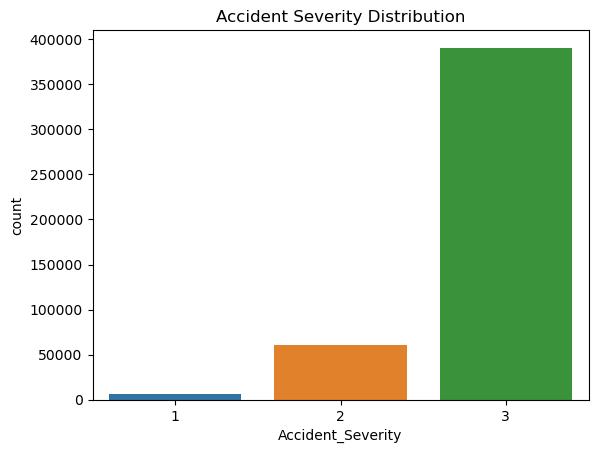

In [44]:
# Accident severity distribution
sns.countplot(x='Accident_Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

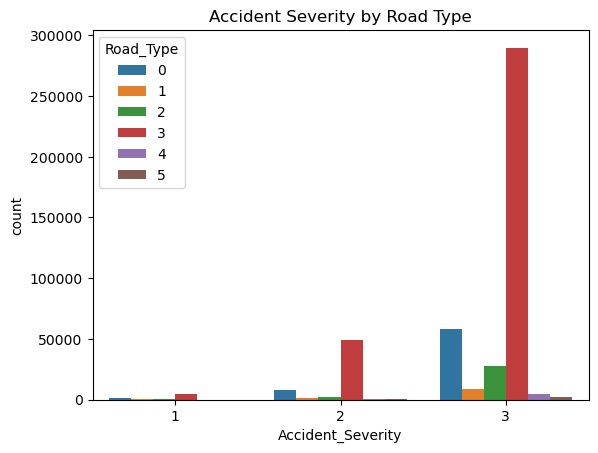

In [45]:
# Severity by Road Type
sns.countplot(x='Accident_Severity', hue='Road_Type', data=df)
plt.title("Accident Severity by Road Type")
plt.show()

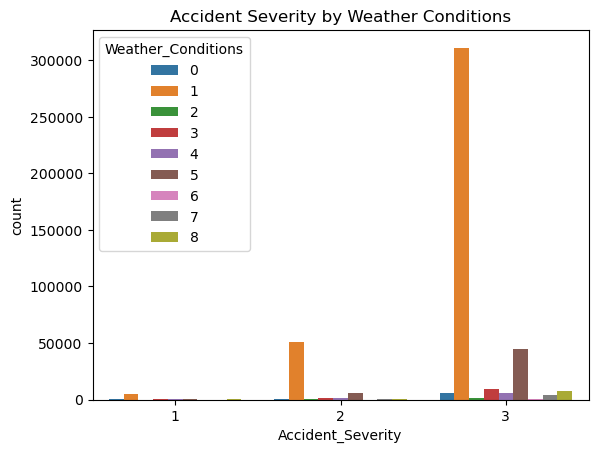

In [46]:
# Severity by Weather Conditions
sns.countplot(x='Accident_Severity', hue='Weather_Conditions', data=df)
plt.title("Accident Severity by Weather Conditions")
plt.show()

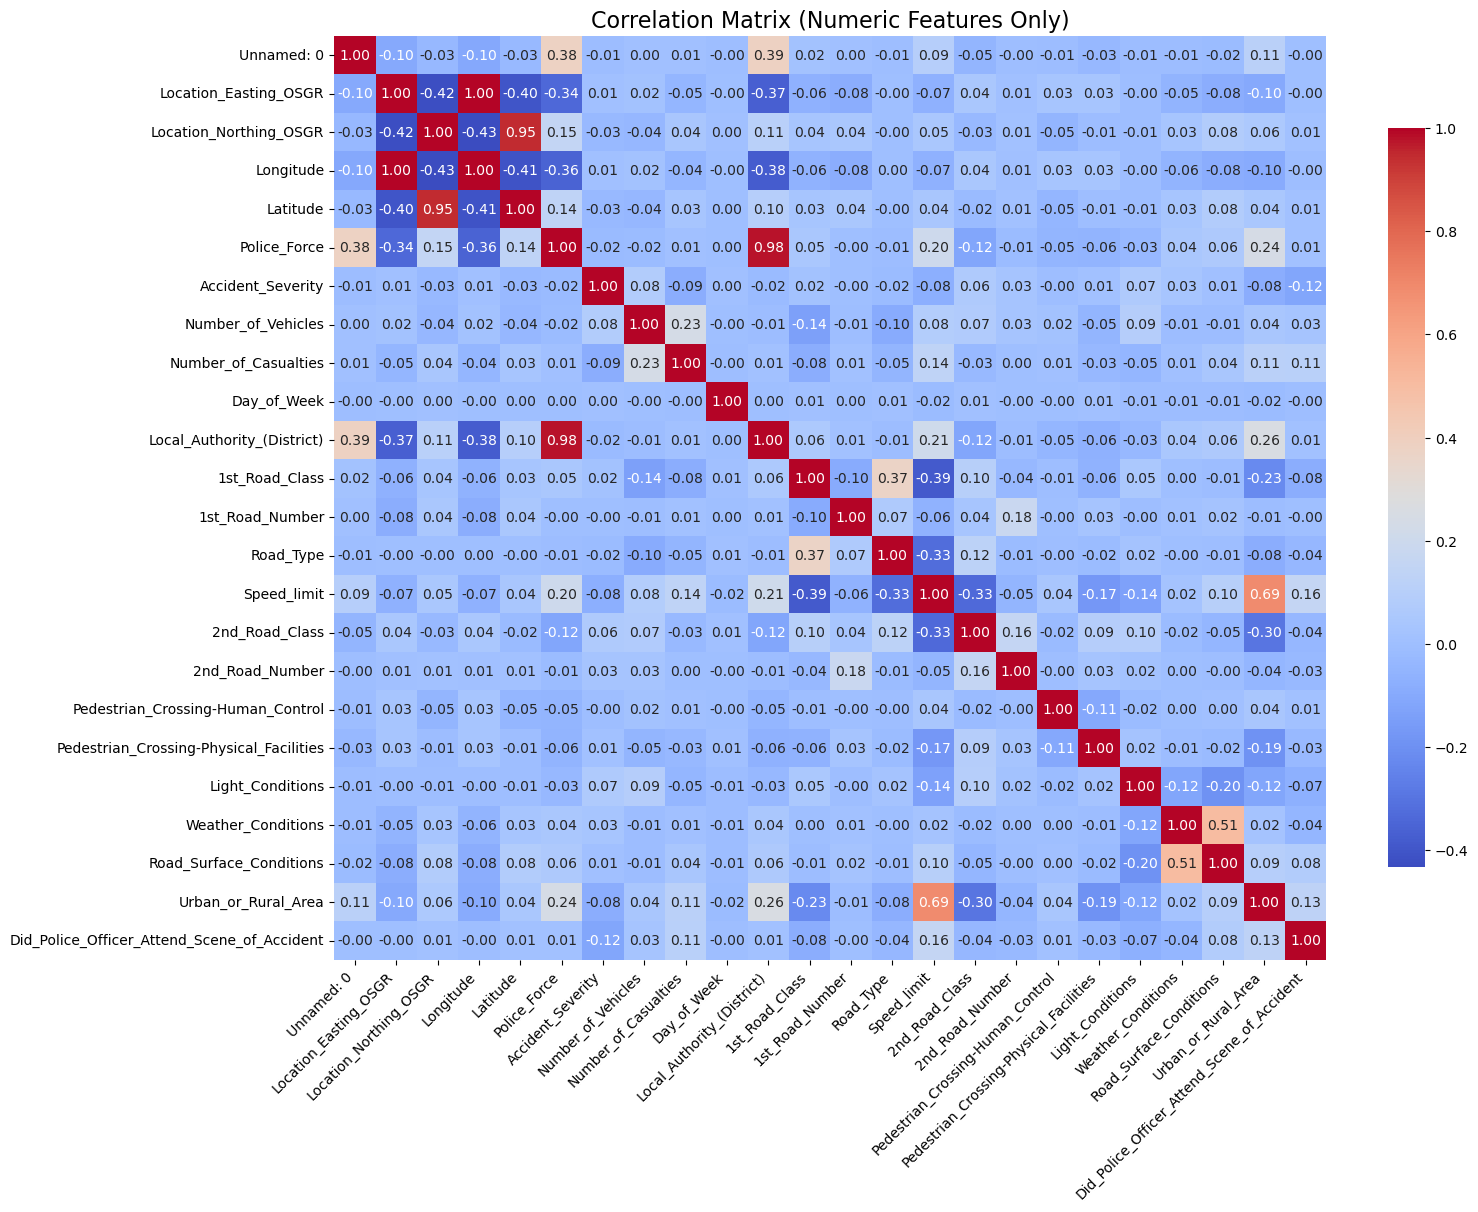

In [47]:
plt.figure(figsize=(16,12))  
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size":10},  
    cbar_kws={"shrink": 0.8}  
)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(rotation=0, fontsize=10)  
plt.title("Correlation Matrix (Numeric Features Only)", fontsize=16)
plt.show()

In [48]:
y = df['Accident_Severity']
X = df.drop(['Accident_Severity', 'Accident_Index', 'Date', 
             'LSOA_of_Accident_Location', 'Local_Authority_(Highway)'], axis=1)

# Accident Severity will be our target.(y)

In [50]:
# Encoding the categorical features (LABEL ENCODING)
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
#Most machine learning algorithms can NOT  handle text/categorical data directly, 
#so we convert categories into numerical codes. This step makes the dataset ML-ready.

In [51]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

#Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [52]:
X['Hour'] = pd.to_datetime(X['Time'], format='%H:%M', errors='coerce').dt.hour


In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
#I built a Random Forest with 100 trees.

#I trained it on X_train, y_train.

#I predicted accident severity for the test data (X_test).

#Now I have predictions (y_pred) that you can compare with the true labels (y_test). 
#Now its time to compute accuracy, precision, recall, f1-score, or confusion matrix.

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.858494066631258
              precision    recall  f1-score   support

           1       0.96      0.03      0.05      1811
           2       0.77      0.05      0.09     18380
           3       0.86      1.00      0.92    117252

    accuracy                           0.86    137443
   macro avg       0.86      0.36      0.36    137443
weighted avg       0.85      0.86      0.80    137443



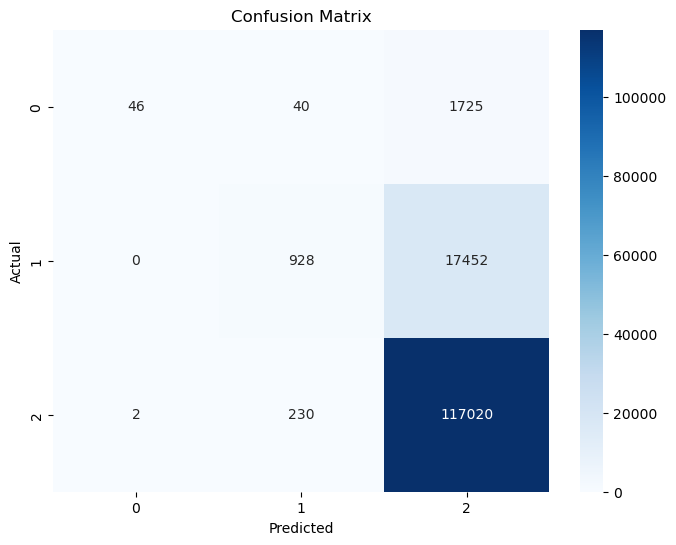

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

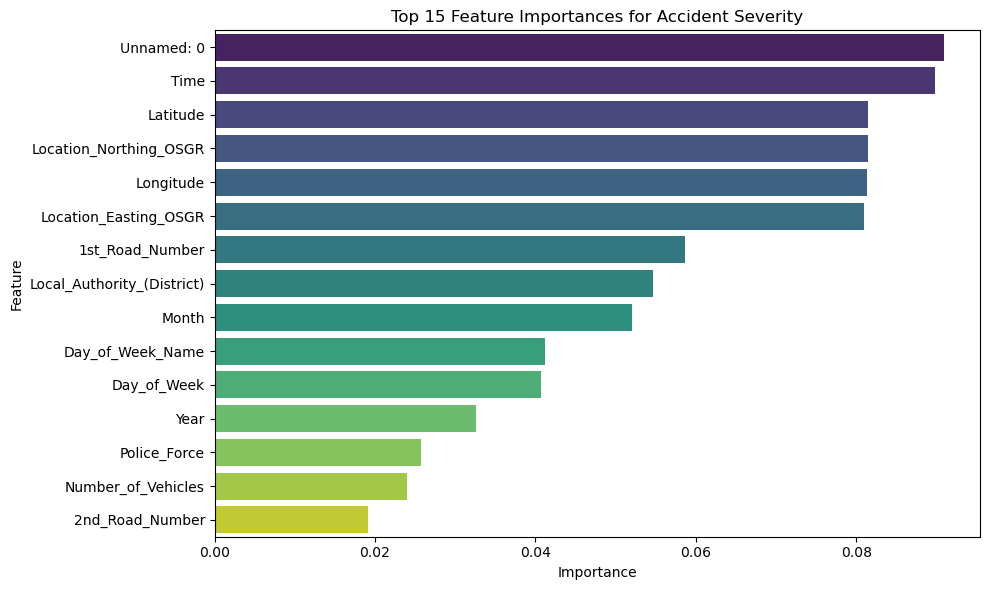

Top 15 features influencing Accident Severity:
                       Feature  Importance
0                   Unnamed: 0    0.090876
1                         Time    0.089806
2                     Latitude    0.081466
3       Location_Northing_OSGR    0.081420
4                    Longitude    0.081279
5        Location_Easting_OSGR    0.080953
6              1st_Road_Number    0.058680
7   Local_Authority_(District)    0.054644
8                        Month    0.052012
9             Day_of_Week_Name    0.041184
10                 Day_of_Week    0.040702
11                        Year    0.032547
12                Police_Force    0.025701
13          Number_of_Vehicles    0.024043
14             2nd_Road_Number    0.019106


In [67]:
feature_names = X_train.columns   # <- use X_train, not X
importances = model.feature_importances_

# Create DataFrame
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feat_df = feat_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='viridis')
plt.title("Top 15 Feature Importances for Accident Severity")
plt.tight_layout()
plt.show()

print("Top 15 features influencing Accident Severity:")
print(feat_df.head(15))


In [68]:
# In the future modelling we are going to drop the 'Unnamed:0'

In [69]:
#Top features influencing accident severity:

#Geographical features are very important:

#==>>Latitude, Longitude, Location_Northing_OSGR, Location_Easting_OSGR

#Road and temporal features also contribute significantly:

#==>>1st_Road_Number, Local_Authority_(District), Month, Day_of_Week_Name, Day_of_Week, Year

#Other factors: Police_Force, Number_of_Vehicles, 2nd_Road_Number have lower but noticeable influence.